In [ ]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files
train_files_healthy = r"C:\Users\jasmi\Downloads\disease\Train\Train\Healthy"
train_files_powdery = r"C:\Users\jasmi\Downloads\disease\Train\Train\Powdery"
train_files_rust = r"C:\Users\jasmi\Downloads\disease\Train\Train\Rust"

test_files_healthy = r"C:\Users\jasmi\Downloads\disease\Test\Test\Healthy"
test_files_powdery = r"C:\Users\jasmi\Downloads\disease\Test\Test\Powdery"
test_files_rust = r"C:\Users\jasmi\Downloads\disease\Test\Test\Rust"

valid_files_healthy = r"C:\Users\jasmi\Downloads\disease\Validation\Validation\Healthy"
valid_files_powdery = r"C:\Users\jasmi\Downloads\disease\Validation\Validation\Powdery"
valid_files_rust = r"C:\Users\jasmi\Downloads\disease\Validation\Validation\Rust"


print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_powdery))
print("Number of rusty leaf images in test set", total_files(test_files_rust))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_files_rust))

In [ ]:
from PIL import Image
import IPython.display as display

image_path = r"C:\Users\jasmi\Downloads\disease\Train\Train\Healthy\8ce77048e12f3dd4.jpg"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))


In [ ]:
%pip install tensorflow


In [ ]:

import tensorflow as tf
print(tf.__version__)


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [1]:
train_generator = train_datagen.flow_from_directory(r"C:\Users\jasmi\Downloads\disease\Train\Train",
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(r"C:\Users\jasmi\Downloads\disease\Validation\Validation",
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')


NameError: name 'train_datagen' is not defined

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential()
model.add(Input(shape=(225, 225, 3)))   # Input layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 328s 8s/step - accuracy: 0.6604 - loss: 0.7500 - val_accuracy: 0.7333 - val_loss: 0.6043
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 300s 7s/step - accuracy: 0.8139 - loss: 0.4346 - val_accuracy: 0.8500 - val_loss: 0.4656
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 296s 7s/step - accuracy: 0.8850 - loss: 0.3316 - val_accuracy: 0.8333 - val_loss: 0.4777
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 283s 7s/step - accuracy: 0.9085 - loss: 0.2597 - val_accuracy: 0.8833 - val_loss: 0.4588
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 292s 7s/step - accuracy: 0.9123 - loss: 0.2507 - val_accuracy: 0.7667 - val_loss: 0.5660


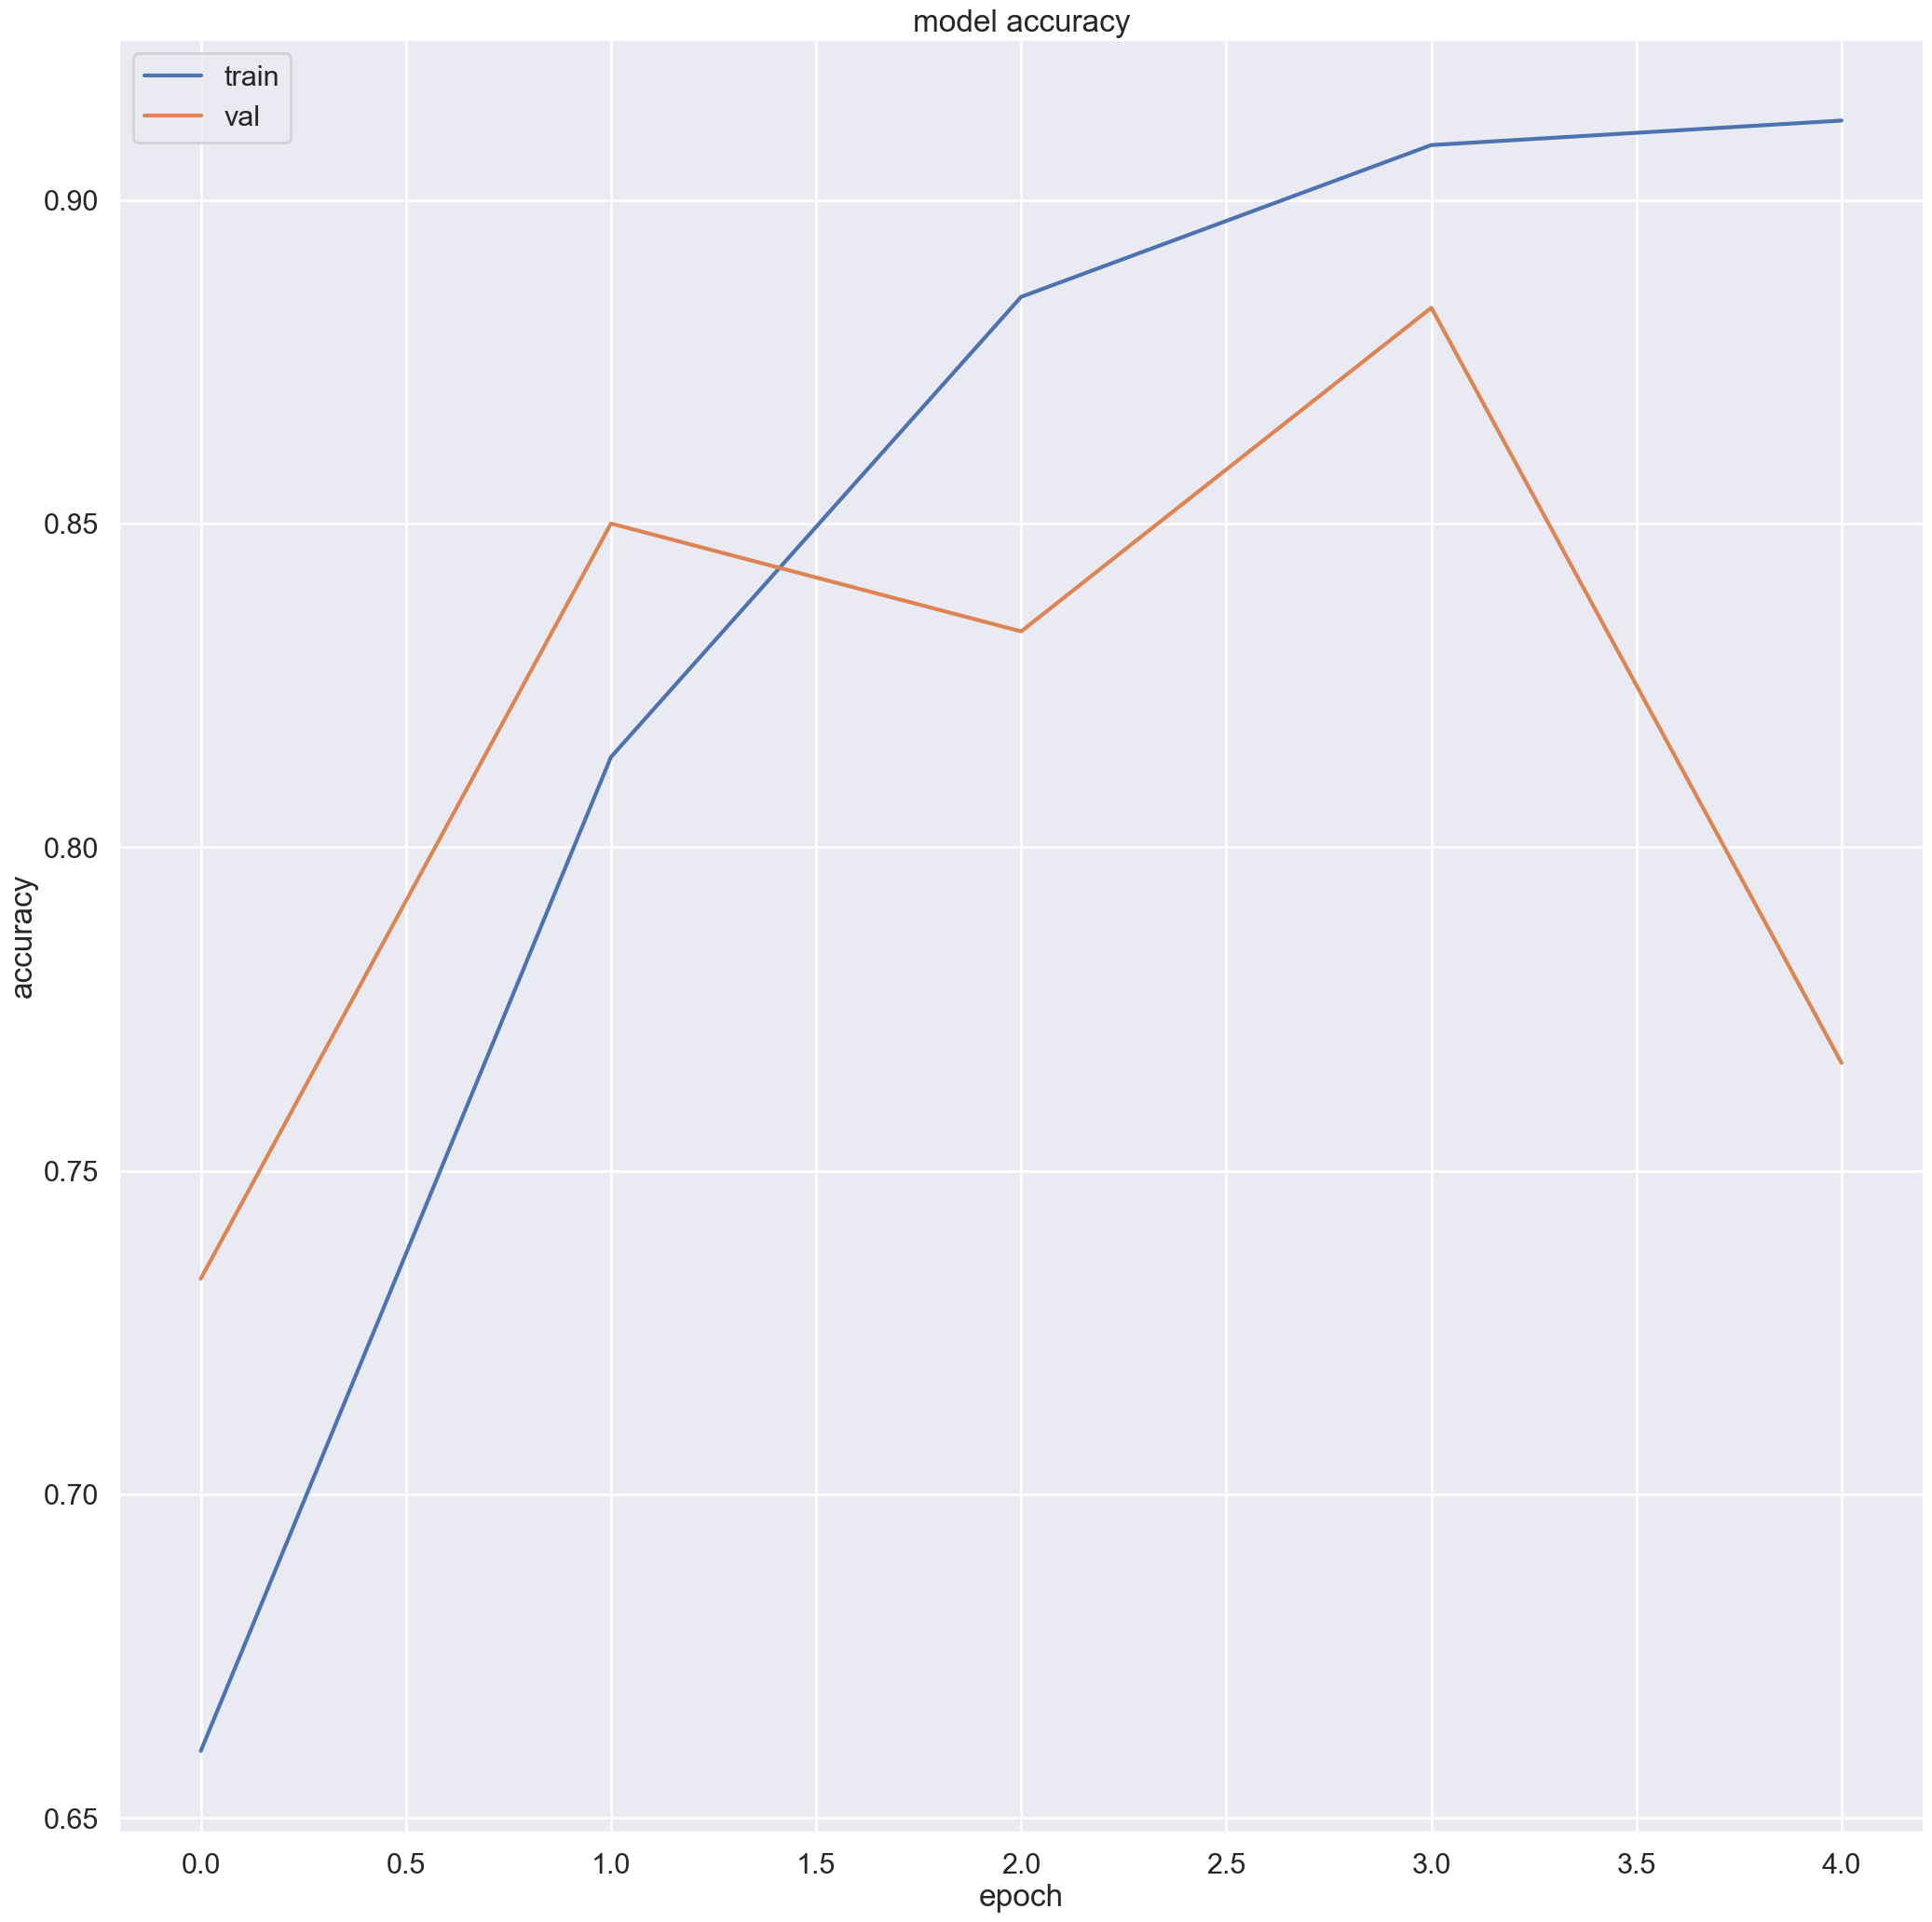

In [9]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
# Save in native Keras format
model.save(r"C:\Users\jasmi\PycharmProjects\mini\model.keras")

# Or save in legacy HDF5 format
# model.save(r"C:\Users\jasmi\PycharmProjects\mini\model.h5")
from tensorflow.keras.models import load_model

# Load native Keras format
loaded_model = load_model(r"C:\Users\jasmi\PycharmProjects\mini\model.keras")

# Or load HDF5 format

C:\Users\jasmi\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image(r"C:\Users\jasmi\Downloads\disease\Test\Test\Rust\82f49a4a7b9585f1.jpg")

In [17]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


array([5.1033831e-01, 4.1973213e-04, 4.8924202e-01], dtype=float32)

In [18]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [19]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Healthy
